# ML 3-class Classification  (DR3)

<h5 style="text-align:right; margin-right:15px"> 2023-12-20 11:36</h5>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fcf68b1fcd0>

MLfit applied to 4FGL-DR3 

SKlearn: SKlearn specifications: 
* features: ('log_var', 'log_fpeak', 'log_epeak', 'd')
* targets: {'pulsar': ('psr', 'msp'), 'bll': ('bll',), 'fsrq': ('fsrq',)}
* model: SVC(C=1, gamma=2)
        

## Feature distributions 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fcf6612dde0>
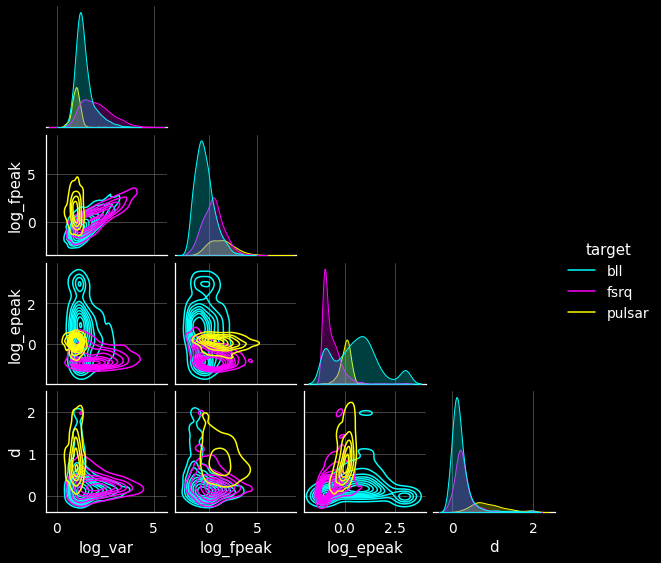

## Train then apply prediction 

### The confusion matrix

prediction,bll,fsrq,pulsar
associations,,,
bll,1253,100,3
fsrq,146,618,7
pulsar,11,2,277


purity=0.97, efficiency=0.96

### All predictions

prediction,bll,fsrq,pulsar
association,,,
bll,1253,100,3
fsrq,146,618,7
psr,3,0,140
msp,8,2,137
glc,7,3,24
bcu,1056,402,96
spp,23,12,66
other,62,38,32
unid,917,347,915


<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fcf661e6e60>
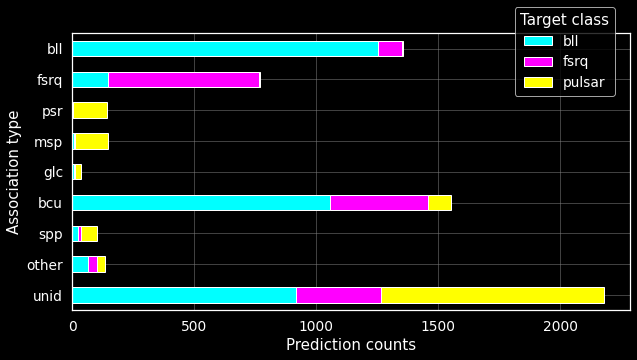

#### Write summary file

File `files/dr3_3_class_classification.csv` exists--not overwriting.


In [1]:
%run pylib/ml_fit dr3  show dark
self=doc(3,2)


## Compare $E_p$ vs $d$ for training and unid prediction

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fcf647a42b0>
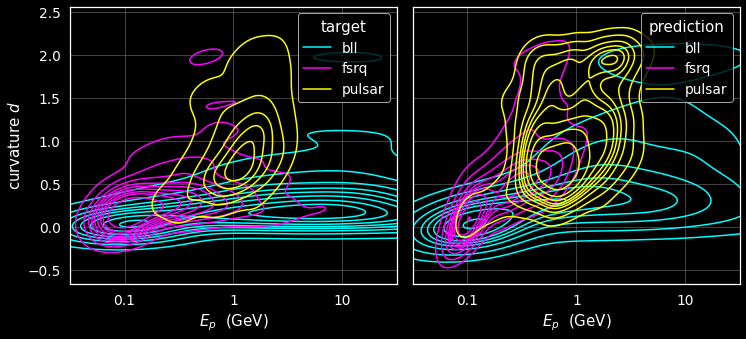

In [2]:
show(f"""## Compare $E_p$ vs $d$ for training and unid prediction""")
show_fig(self.ep_vs_d)

In [ ]:
probs= self.predict_prob(query=None)
df = pd.concat([self.df, probs], axis=1)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fcf47c2d630>
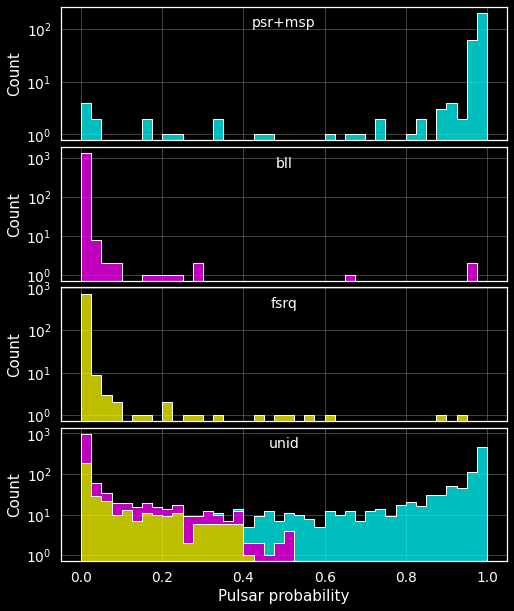

In [85]:
def pulsar_prob_hists(self):
    """Histograms of the classifier pulsar probability. 
    Upper three plots: each of the labeled target clases; bottom plot: stacked histogram
    for the classifier assigments, colors corresponding to the plots above.
    """
    titles = ['psr+msp','bll','fsrq','unid']
    fig, axx = plt.subplots(nrows=4, figsize=(8,10),sharex=True,
                                 gridspec_kw=dict(hspace=0.05))
    kw = dict( x='p_pulsar',  bins=np.arange(0,1.01, 0.025), log_scale=(False,True),
                  element='step', multiple='stack', legend=False)
    sns.histplot(df, ax=axx[0],  hue='target',hue_order='pulsar'.split(),
                 palette=self.palette[0:1],**kw)            

    sns.histplot(df, ax=axx[1],  hue='target', hue_order='bll'.split(), 
                 palette=self.palette[1:2],**kw)  
    sns.histplot(df, ax=axx[2],  hue='target', hue_order='fsrq'.split(), 
                 palette=self.palette[2:],**kw)  
    
    sns.histplot(df.query('association=="unid"'), ax=axx[3], hue='prediction', 
                 hue_order='pulsar bll fsrq'.split(),
                 palette=self.palette,**kw);
    axx[-1].set(xlabel='Pulsar probability')
    for ax, title in zip(axx, titles):
        ax.text( 0.5, 0.85, title, ha='center', transform=ax.transAxes, fontsize=14)
    return fig
show_fig(pulsar_prob_hists, self, )

In [117]:
unid = df.query('association=="unid"').copy()
d = {'Total'     : len(unid),
     'predicted pulsar' : len(unid.query('prediction=="pulsar"')),
     'Likely blazar'    : len(unid.query('p_pulsar<0.1')),
     'Mystery'          : len(unid.query('0.95>p_pulsar>0.1')),
     'Mostly pulsars'   : len(unid.query('p_pulsar>0.95')),
    }
show(pd.Series(d, name='Unid categories'))

,Total,predicted pulsar,Likely blazar,Mystery,Mostly pulsars
Unid categories,2179,915,1095,517,567


<Axes: xlabel='log_epeak', ylabel='d'>

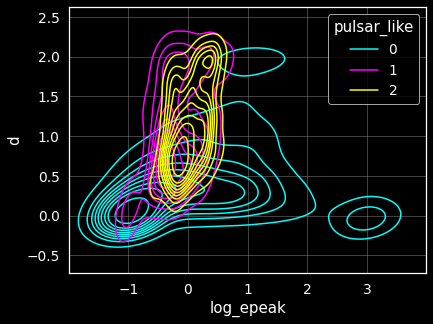

In [124]:
def pulsar_like(p):
    if p < 0.1: return 0
    if p < 0.95: return 1
    return 2
unid['pulsar_like'] = unid.p_pulsar.apply(pulsar_like)
sns.kdeplot(unid, x='log_epeak', y='d', hue='pulsar_like', palette=self.palette)


In [94]:

kw = dict( x='log_epeak', y='d',  palette=self.palette[:len(self.targets)],
          hue_order=self.target_names)

sns.kdeplot(unid, ax=ax2, hue='prediction',**kw);


/home/burnett/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


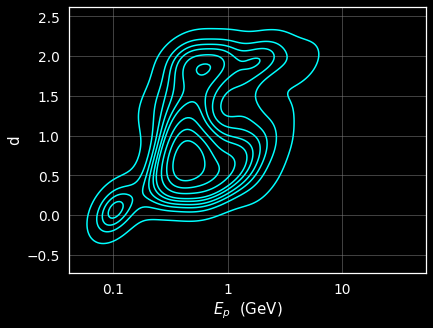

In [102]:
ax=sns.kdeplot(unid.query('0.95>p_pulsar>0.1'), color='cyan', x='log_epeak', y='d');
ax.set(**epeak_kw());